In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
files.upload()

Saving Fraud_check.csv to Fraud_check.csv


{'Fraud_check.csv': b'"Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","Urban"\n"NO","Single",68833,50047,10,"YES"\n"YES","Divorced",33700,134075,18,"YES"\n"NO","Married",36925,160205,30,"YES"\n"YES","Single",50190,193264,15,"YES"\n"NO","Married",81002,27533,28,"NO"\n"NO","Divorced",33329,116382,0,"NO"\n"NO","Divorced",83357,80890,8,"YES"\n"YES","Single",62774,131253,3,"YES"\n"NO","Single",83519,102481,12,"YES"\n"YES","Divorced",98152,155482,4,"YES"\n"NO","Single",29732,102602,19,"YES"\n"NO","Single",61063,94875,6,"YES"\n"NO","Divorced",11794,148033,14,"YES"\n"NO","Married",61830,86649,16,"YES"\n"NO","Married",64070,57529,13,"YES"\n"NO","Divorced",69869,107764,29,"NO"\n"YES","Divorced",24987,34551,29,"NO"\n"YES","Married",39476,57194,25,"NO"\n"YES","Divorced",97957,59269,6,"NO"\n"NO","Single",10987,126953,30,"YES"\n"YES","Single",88636,147222,26,"NO"\n"YES","Divorced",14310,29106,7,"YES"\n"YES","Divorced",78969,155342,14,"NO"\n"NO","Single",92040,50495,

In [ ]:
#Importing Dataset
fraud = pd.read_csv('Fraud_check.csv')


In [ ]:
fraud.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [ ]:
fraud = fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})

In [ ]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud['income_range'] = np.where(fraud['Taxable_Income']>=30000, 'Good', 'Risky')
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraud_data = fraud[['Undergrad', 'Marital_Status','Urban']].apply(label_encoder.fit_transform)
fraud_data = fraud_data.rename(columns={'Undergrad':'Undergrad_numeric', 'Marital_Status':'Marital_Status_numeric','Urban':'Urban_numeric'})

In [ ]:
fraud_data.head()

,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0


In [ ]:
fraud_data = pd.concat([fraud,fraud_data], axis=1, sort=False)
fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,NO,Single,68833,50047,10,YES,Good,0,2,1
1,YES,Divorced,33700,134075,18,YES,Good,1,0,1
2,NO,Married,36925,160205,30,YES,Good,0,1,1
3,YES,Single,50190,193264,15,YES,Good,1,2,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0


In [ ]:
fraud_data.drop(columns={'Undergrad','Marital_Status','Urban','Taxable_Income'},axis=1)

,City_Population,Work_Experience,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,50047,10,Good,0,2,1
1,134075,18,Good,1,0,1
2,160205,30,Good,0,1,1
3,193264,15,Good,1,2,1
4,27533,28,Good,0,1,0
...,...,...,...,...,...,...
595,39492,7,Good,1,0,1
596,55369,2,Good,1,0,1
597,154058,0,Good,0,0,1
598,180083,17,Good,1,1,0


In [ ]:
fraud_data = fraud_data[['City_Population','Work_Experience','Undergrad_numeric','Marital_Status_numeric','Urban_numeric','income_range']]
fraud_data.head()

,City_Population,Work_Experience,Undergrad_numeric,Marital_Status_numeric,Urban_numeric,income_range
0,50047,10,0,2,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,2,1,Good
4,27533,28,0,1,0,Good


In [ ]:
fraud_data.income_range.value_counts()

Good     476
Risky    124
Name: income_range, dtype: int64

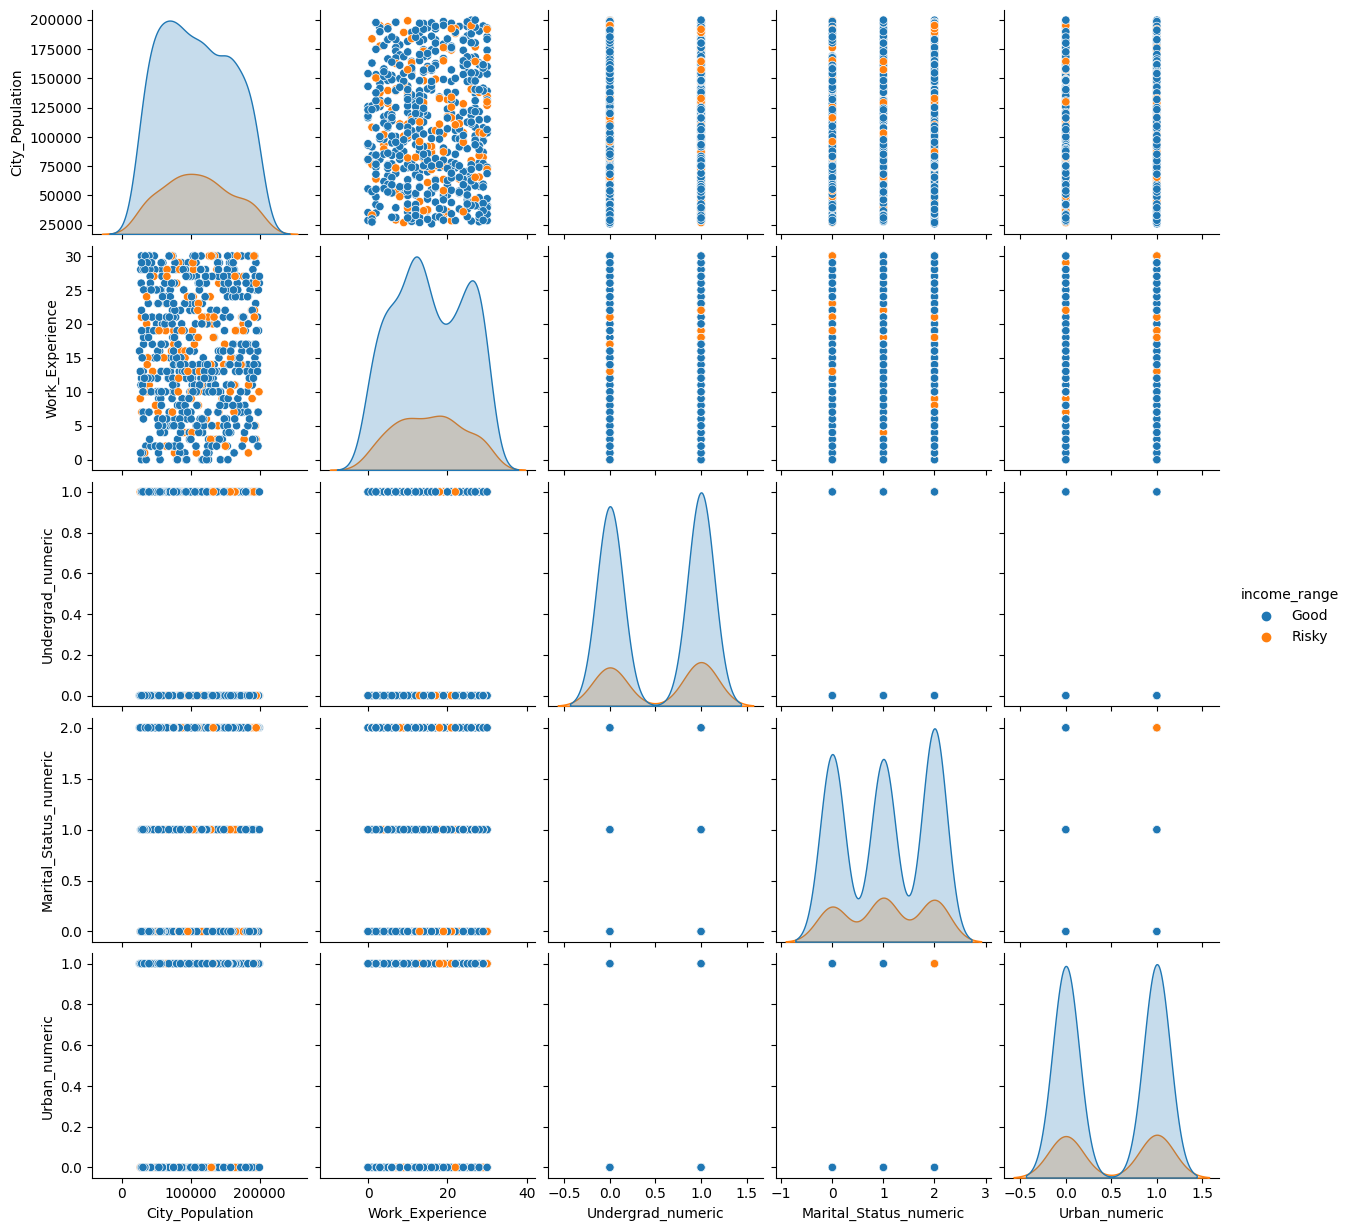

In [ ]:
sns.pairplot(fraud_data,hue='income_range')

In [ ]:
fraud_data.isnull().sum()

City_Population           0
Work_Experience           0
Undergrad_numeric         0
Marital_Status_numeric    0
Urban_numeric             0
income_range              0
dtype: int64

In [ ]:
x=fraud_data.iloc[:,0:5]
y=fraud_data['income_range']

In [ ]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [ ]:
# Building Decision Tree Classifier using Entropy Criteria
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

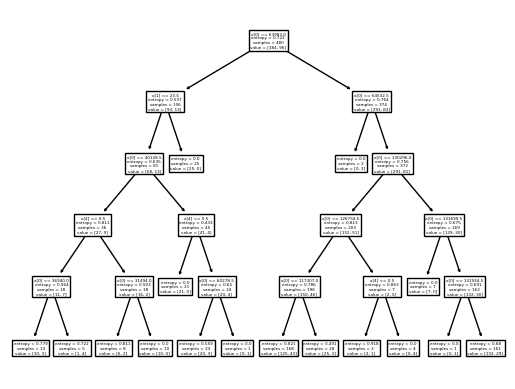

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [ ]:
fn=['City_Population',
 'Work_Experience',
 'Undergrad_numeric',
 'Marital_Status_numeric',
 'Urban_numeric']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi=5000)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

Good     117
Risky      3
dtype: int64

In [ ]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
income_range,,
Good,91,1
Risky,26,2


In [ ]:
np.mean(preds==y_test)

0.775

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,model.predict(x_test))

array([[91,  1],
       [26,  2]])

In [ ]:
accuracy_score(y_test,model.predict(x_test))

0.775